Load the required Libraries

In [23]:
library(twitteR)
library(tm)
library(wordcloud)

Collect tweets and convert them to a dataframe

In [24]:
setup_twitter_oauth("qbHjaUyzB9HOfhxLfNLZvy1fR","4YvpI3mH6gRBtPBEHECOwTcHawUTBqXcUdQAbWoyxDkV0BwFmW","1203021751-fJTHiOgxzLrv1284Wp06bKyjxFCPJLsJoWVWns0","ig8sBCxzLukKFbSvSkHKSrXC7MGOT7Fhsvu0XTSKY7PBM")
hashtag = "#politics"
tweets <- searchTwitter(hashtag, n= 2500, lang ="en")
tweets <- twListToDF(tweets)

[1] "Using direct authentication"


Check the contents of the tweets

In [25]:
head(tweets)

text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted,longitude,latitude
RT @Anon_Eu: Elizabeth Warren: Americans Should Keep Demanding To See Trump's Taxes https://t.co/NI7r4m1nvr #News #Politics https://t.co/Zp…,FALSE,0,NA,2017-04-18 16:42:07,FALSE,NA,854374495091478529,NA,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",MessBusterAK,1,TRUE,FALSE,NA,NA
In Moscow raised the alarm unit of the air defense -#Politics-#News--https://t.co/M3qS0Ieefq,FALSE,0,NA,2017-04-18 16:41:51,FALSE,NA,854374425994678273,NA,"<a href=""http://the-newspapers.com/"" rel=""nofollow"">The-Newspapers</a>",RusNewspapers,0,FALSE,FALSE,NA,NA
"By pivoting to the center, #Trump is playing a dangerous game with his base. #politics #POTUS45 #stephenbannon https://t.co/6J3AHRHiX4",FALSE,0,NA,2017-04-18 16:41:21,FALSE,NA,854374300027146240,NA,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",AlabamaRedTory,0,FALSE,FALSE,NA,NA
At the moment one thing I don't want to focus mentally or optically is #politics. Never liked them any way. #art https://t.co/dFFmBEYTYe,FALSE,0,NA,2017-04-18 16:41:05,FALSE,NA,854374235686531073,NA,"<a href=""http://twitter.com/#!/download/ipad"" rel=""nofollow"">Twitter for iPad</a>",nazipova,0,FALSE,FALSE,NA,NA
"Unless I go full on Viqueen, I can't do shit about this situation. #politics #frustration #grapesalad",FALSE,0,NA,2017-04-18 16:41:00,FALSE,NA,854374211976089600,NA,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",Nilings,0,FALSE,FALSE,NA,NA
@BareReality And politicians wonder why we don't trust them! Every single one is hypocritical. #promisespromises… https://t.co/WaD1vhyAFt,FALSE,0,BareReality,2017-04-18 16:40:58,TRUE,854299925856886785,854374204652826624,1361872532,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",kcm76,0,FALSE,FALSE,NA,NA


Extract the text part of the tweets and convert it to a corpus
Inspect the corpus

In [26]:
tweets_corp = Corpus(VectorSource(tweets$text)) 
inspect(tweets_corp)


<<SimpleCorpus>>
Metadata:  corpus specific: 1, document level (indexed): 0
Content:  documents: 2500

   [1] RT @Anon_Eu: Elizabeth Warren: Americans Should Keep Demanding To See Trump's Taxes https://t.co/NI7r4m1nvr #News #Politics https://t.co/Zp…                                                                                                                    
   [2] In Moscow raised the alarm unit of the air defense -#Politics-#News--https://t.co/M3qS0Ieefq                                                                                                                                                                    
   [3] By pivoting to the center, #Trump is playing a dangerous game with his base. #politics #POTUS45 #stephenbannon https://t.co/6J3AHRHiX4                                                                                                                          
   [4] At the moment one thing I don't want to focus mentally or optically is #politics. Never liked them

Cleaning the tweets which include the following;
1) Strip the extra white spaces
2) Remove the stop words
3) Remove punctutations 
4) Remove numbers
5) Remove emoji characters and convert everything to lower case

tm_map function is used to do the above tasks [1]

In [27]:
tweets_clean <- tm_map(tweets_corp,stripWhitespace)

In [28]:
tweets_clean <- tm_map(tweets_clean, removeWords, c(stopwords("english")))

In [29]:
tweets_clean <- tm_map(tweets_clean,removePunctuation)

In [30]:
tweets_clean <- tm_map(tweets_clean, removeNumbers)

In [31]:
tweets_quote <- as.data.frame(sapply(df, function(x) gsub("\"", "", tweets_clean)))

Check the cleaned tweets

In [32]:
tweets_final <- tweets_quote$x

In [ ]:
tweets_clean <- tolower(tweets_final)

Write it to a csv file to process it further

In [38]:
write.csv(tweets_clean, file = "Desktop/tweets_final.csv",row.names=FALSE, na="")

Read the input file for the wordcloud containing word and its frequency 

In [13]:
input <- read.csv("Desktop/input.csv")

Rename the columns 

In [14]:
names(input)[1] <- "word"
names(input)[2] <- "freq"

Plot the word cloud with this data [2]

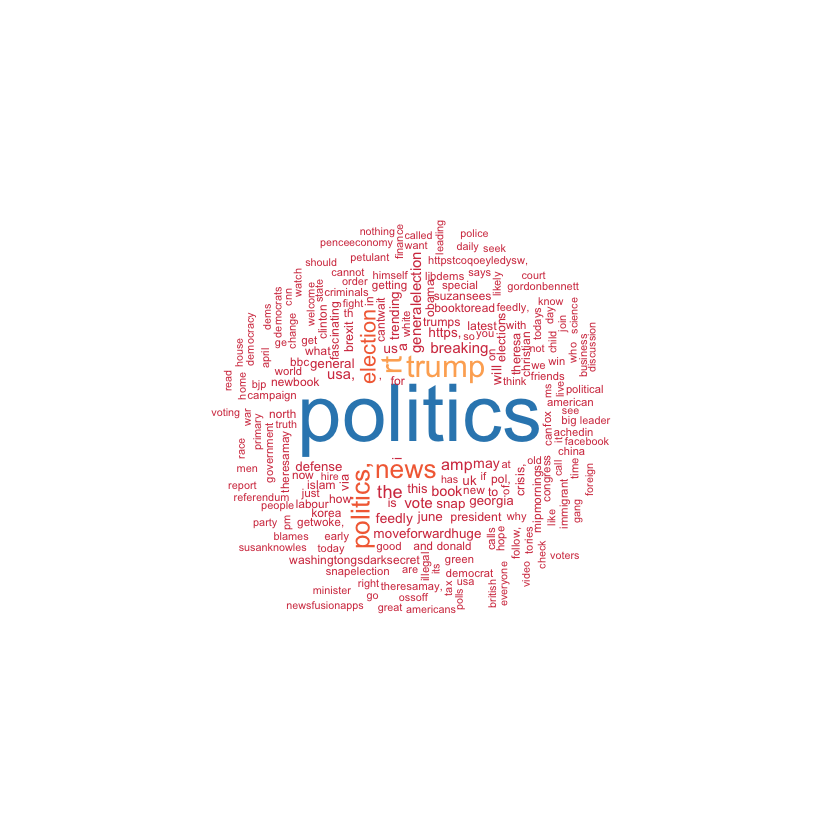

In [28]:
wordcloud(words = input$word, freq = input$freq, min.freq = 1,
          max.words=200, random.order=FALSE, rot.per=0.35, 
          colors=brewer.pal(8, "Spectral"))

[1] https://cran.r-project.org/web/packages/tm/vignettes/tm.pdf
    http://stackoverflow.com/questions/9934856/removing-non-ascii-characters-from-data-files
[2] http://www.sthda.com/english/wiki/text-mining-and-word-cloud-fundamentals-in-r-5-simple-steps-you-should-know